# Interference Phenomena

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In the last lab, you were asked to do a double slit interference pattern.  Here are some functions you needed.  (Run it with Shift-Enter so you can use them.)

In [2]:
def convert_units(y_mm, s_mm, L_m, lam_nm):
    y_m = y_mm * 1e-3
    s_m = s_mm * 1e-3
    lam_m = lam_nm * 1e-9
    return y_m, s_m, L_m, lam_m

def r(y_in_m, s_in_m, L_in_m):
    return np.sqrt(L_in_m**2 + (y_in_m-s_in_m)**2)

def ComplexWave(r_in_m, lam_in_m):
    return np.exp(1j * 2 * np.pi * r_in_m / lam_in_m)

def DoubleSlitIntensity(y_in_mm, d_in_mm, L_in_m, lam_in_nm):
    y_m, d_m, L_m, lam_m = convert_units(y_in_mm, d_in_mm, L_in_m, lam_in_nm)
    
    total_wave = 0
    
    r_value = r(y_m, -d_m/2, L_m)
    total_wave = total_wave + ComplexWave(r_value, lam_m)
    
    r_value = r(y_m, d_m/2, L_m)
    total_wave = total_wave + ComplexWave(r_value, lam_m)
    
    return (np.abs(total_wave))**2

- Function: ``DoubleSlitIntensity(y_in_mm, d_in_mm, L_in_m, lam_in_nm)``:
    - **Inputs**: ``y_in_mm``: location on screen in mm
    - ``d_in_mm``: distance between slits in mm
    - ``L_in_m``: distance to screen in m
    - ``lam_in_nm``: wavelength in nm
    - **Output**: Intensity of light

Now, we want to make a plot.  Let's use $d = 0.05~{\rm mm}$, $L = 2~{\rm m}$, $\lambda = 400~{\rm nm}$ and the function ``DoubleSlitIntensity()`` to make a plot between $y = -50~{\rm mm}$ to $50~{\rm mm}$.  Most of the code is written below, just include the one missing line:

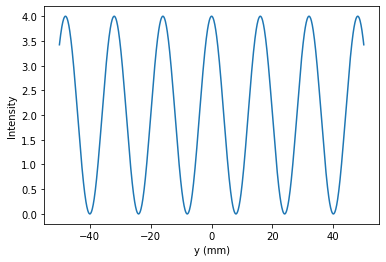

In [4]:
y = np.linspace(-50,50,1000)
intensity = np.zeros(len(y))
for i in range(len(y)):
    intensity[i] = DoubleSlitIntensity(y[i], .05, 2, 400)   #<== put the appropriate inputs to the function here
plt.figure()
plt.plot(y,intensity)
plt.ylabel("Intensity")
plt.xlabel("y (mm)")
plt.show()

We want to deal with an N-slit device: one that has an arbitrary number of slits.  To do this we need to generalize our Double Slit function to have multiple slits.  We will walk through how to use the code as written above and incorporate a ``for`` loop.

First, let's create an array that has the locations of the two slits: 

In [5]:
d_in_m = 0.05 * 1e-3
slit_locations = np.array([-d_in_m/2, d_in_m/2])

Use a print statement to figure out what is ``slit_locations[0]`` and ``slit_locations[1]``.

In [6]:
print(slit_locations[0])
print(slit_locations[1])

-2.5e-05
2.5e-05


Now we are ready to create a new function.  In the function below, replace the ``*!*!*`` with either ``slit_locations[0]`` or ``slit_locations[1]`` to match the function ``DoubleSlitIntensity( )`` above.

In [7]:
def NSlitIntensity_1(y_in_mm, d_in_mm, L_in_m, lam_in_nm):
    y_m, d_m, L_m, lam_m = convert_units(y_in_mm, d_in_mm, L_in_m, lam_in_nm)
    
    slit_locations = np.array([-d_m/2, d_m/2])
    
    total_wave = 0
    
    r_value = r(y_m, slit_locations[1], L_m)
    total_wave = total_wave + ComplexWave(r_value, lam_m)
    
    r_value = r(y_m, slit_locations[0], L_m)
    total_wave = total_wave + ComplexWave(r_value, lam_m)
    
    return (np.abs(total_wave))**2

Now, we need to test that this works.  Make a plot, as you did above, except use this new function, ``NSlitIntensity_1``.

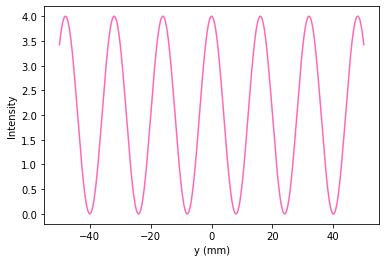

In [8]:
y = np.linspace(-50,50,1000)
intensity = np.zeros(len(y))

for i in range(len(intensity)):
    intensity[i] = NSlitIntensity_1(y[i],  .05, 2, 400)
    
plt.figure()
plt.plot(y, intensity, color= "hotpink")
plt.ylabel("Intensity")
plt.xlabel("y (mm)")
plt.show()

Once this works, hopefully you'll notice that this is ripe for the use of a ``for`` loop.  In the function below, use a ``for`` loop to have the same result as ``NSlitIntensity_1`` above.  Follow it up by making a plot to ensure we get the same results.  Remember, instead of using ``in range(2):`` for your loop, try using ``in range(len(slit_locations)):``

In [9]:
def NSlitIntensity_2(y_in_mm, d_in_mm, L_in_m, lam_in_nm):
    y_m, d_m, L_m, lam_m = convert_units(y_in_mm, d_in_mm, L_in_m, lam_in_nm)
    
    slit_locations = np.array([-d_m/2, d_m/2])
    
    total_wave = 0
    
    for i in range(len(slit_locations)):
        r_value = r(y_m, slit_locations[i], L_m)
        total_wave = total_wave + ComplexWave(r_value, lam_m)
    
    
    
    return (np.abs(total_wave))**2

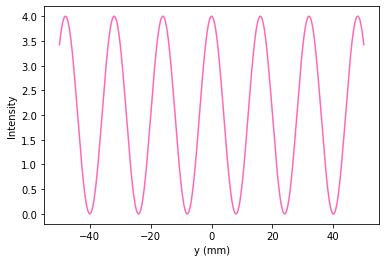

In [11]:
y = np.linspace(-50,50,1000)
intensity = np.zeros(len(y))

for i in range(len(intensity)):
    intensity[i] = NSlitIntensity_2(y[i],  .05, 2, 400)
    
plt.figure()
plt.plot(y, intensity, color= "hotpink")
plt.ylabel("Intensity")
plt.xlabel("y (mm)")
plt.show()

Now we can generalize our result to have N-slits.  The difference is that instead of adding two waves (two complex exponentials) as we did for the double slit, we will add N waves.  Hopefully, we wrote our ``for`` loop generally enough to take this into account.

First, let's sketch a 2-, 3-, and 4-slit device.  In the figure, the dashed line represents the center, which we will call $s = 0$, and we will call $d$ the distance between the slits.

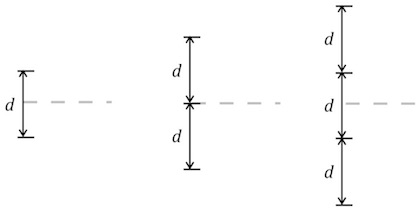

We are going to use $d = 0.05~{\rm mm}$.  The table below shows the value of N (number of slits) and the slit locations (given here, in mm).

- N = 2, d = 0.05:  -0.025 mm, 0.025 mm
- N = 3, d = 0.05:  -0.05 mm, 0 mm, 0.05 mm
- N = 4, d = 0.05:  -0.075 mm, -0.025 mm, 0.025 mm, 0.075 mm


First, create a function that takes inputs ``N`` and ``d_in_mm``, and outputs an array with N elements that has the location of the slits.  Where are they?  It happens they follow the formula:

$\displaystyle s_i = - \frac{d (N-1)}{2} + i d$, for $i = 0, 1, \ldots, N-1$.

How do we know this is correct?  First, write a function that will create an array of these values.  In the function you will:
- first, initialize an array, as we've done when creating the y-axis for plots.
- next, use a ``for`` loop to set the individual elements of the array, using the formula above.

In [44]:
def make_slits(N,d_in_m):
    slits = np.zeros(N) 
    
    for i in range(len(slits)):
        slits[i] =(-d_in_m*(N-1))/2 + i * d_in_m
    
    return slits


Test it out your function with d = 0.05 mm and N = 2, 3 and 4, and make sure the results make sense.

In [45]:
# change the line below to test that your function works as expected:
print(make_slits(4 , 0.05 * 1e-3))

[-7.5e-05 -2.5e-05  2.5e-05  7.5e-05]


Now we're ready to create a function that **has five inputs** -- N and the four inputs from ``DoubleSlitIntensity()`` (or ``NSlitIntensity_1`` and 2), and that outputs the intensity using the same process as in ``NSlitIntensity_2``.  (In fact, you should start with ``NSlitIntensity_2`` and modify it for your needs.  There should only be a couple of small modifications!).

In [48]:
def NSlitIntensity_3(N, y_in_mm, d_in_mm, L_in_m, lam_in_nm):
    y_m, d_m, L_m, lam_m = convert_units(y_in_mm, d_in_mm, L_in_m, lam_in_nm)
    
    slit_locations = make_slits(N, d_m)
    
    total_wave = 0
    
    for i in range(len(slit_locations)):
        r_value = r(y_m, slit_locations[i], L_m)
        total_wave = total_wave + ComplexWave(r_value, lam_m)
    
    
    
    return (np.abs(total_wave))**2

How do we test if this works?  We can test the function with d = 0.05 mm, L = 2 m, $\lambda$ = 400 nm, and N = 2.  This is important because it should look exactly like the double slit.

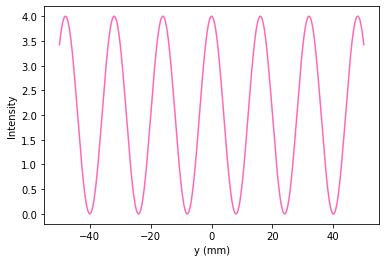

In [49]:
y = np.linspace(-50,50,1000)
intensity = np.zeros(len(y))

for i in range(len(intensity)):
    intensity[i] = NSlitIntensity_3(2, y[i],  .05, 2, 400)
    
plt.figure()
plt.plot(y, intensity, color= "hotpink")
plt.ylabel("Intensity")
plt.xlabel("y (mm)")
plt.show()

Create a function that plots the intensity.  The function should have inputs: N, d, L, and $\lambda$, and it should make a plot using the NIntensity function to plot intensity versus y for y from -50 to 50 mm.  Test your function with the same inputs as the double slit to make sure it works.

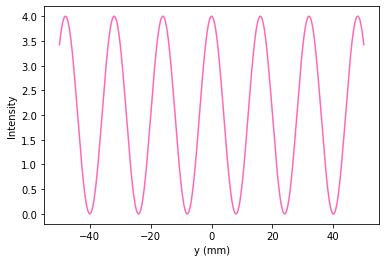

In [50]:
def plot_intensity(N, d_in_mm, L_in_m, lam_in_nm):
    y = np.linspace(-50,50,1000)
    intensity = np.zeros(len(y))

    for i in range(len(intensity)):
        intensity[i] = NSlitIntensity_3(N, y[i], d_in_mm, L_in_m, lam_in_nm)
    
    plt.figure()
    plt.plot(y, intensity, color= "hotpink")
    plt.ylabel("Intensity")
    plt.xlabel("y (mm)")
    plt.show() 

plot_intensity(2, .05, 2, 400)

Make a new slider that includes a range of N = 2 to 10 in increments of 1.  (Yes, you will have sliders for the other four varaibles as well.)  What happens as N increases?

In [55]:
widgets.interact(plot_intensity, N=(2,10,1), d_in_mm = widgets.fixed(.05), L_in_m = 2, lam_in_nm = 400)

interactive(children=(IntSlider(value=6, description='N', max=10, min=2), IntSlider(value=2, description='L_in…

<function __main__.plot_intensity(N, d_in_mm, L_in_m, lam_in_nm)>

<b>Example:  Single-Slit Diffraction.</b>  Now, single-slit diffraction can be treated as if there are many (infinitely many?) slits providing waves that interfere at the screen.  So, how do we use what we've already created to do single slit?  

The inputs to our plotting function were N, d, L, $\lambda$.  L and $\lambda$ have nothing to do with the slit, but N is the number of slits and d is the distance between them.

Our goal is to make N as big as possible (without killing our computer).  How do we find d?  Well, we usually call the width of the slit a.  The entire slit is going to include N-1 increments of d, therefore:  $\displaystyle d = a / (N-1)$.  

Create a function that accepts as inputs:  N, a, L and $\lambda$.  This function will plot the single slit interference pattern for a slit with width a, plot the intensity as a function of y using 100 points on the screen between y = -50 mm and y = +50 mm.

Once you have a function, test it out with N = 100, a = 0.05 mm, L = 2 m and $\lambda$ = 400 nm.  Can you run it 10 times longer without it taking more than a second or so?  Try it out.  Increase by factors of 10 until the running time takes longer than a second (or until you reach N = $10^9$, because that's a lot).

How do we know that was correct?  First off, does it have the right form?

Second, we should do a calculation to see what we expect.  The second minimum (destructive interference) occurs at:
<center> $a \sin \theta = 2 \lambda$</center>
which corresponds to a y value:
<center>$ y = L \tan \theta$.</center>
Let's use a wavelength of 400 nm, with L = 2 m and a = 0.05 mm.  Calculate the expected location of the second minimum.  Does it agree with your graph?

Create a slider to show the results when wavelength, L or a is changed:
- Wavelength values of 400 to 700 nm, in increments of 10 nm
- L from 1 to 2 m, in increments of 0.1 m
- a from 0.01 to 0.1 mm in increments of 0.01 mm
Double check with the values you've already used to make sure it works.

Use your slider to answer the following:

In [ ]:
# When wavelength increases, the pattern:
# When L increases, the pattern:
# When a increases, the pattern:

## Completing this lab in its entirety is Homework 5.  Please Submit by Monday, March 21

Before you submit, make sure that your code works with Kernel > Restart & Run All